<a href="https://colab.research.google.com/github/Phunbie/assignments/blob/main/ML_Zoomcamp_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df = df[['neighbourhood_group','room_type','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

In [5]:
df = df.fillna(0)
df.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [6]:
df

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,0.00,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Private room,40.67853,-73.94995,70,2,0,0.00,2,9
48891,Brooklyn,Private room,40.70184,-73.93317,40,4,0,0.00,2,36
48892,Manhattan,Entire home/apt,40.81475,-73.94867,115,10,0,0.00,1,27
48893,Manhattan,Shared room,40.75751,-73.99112,55,1,0,0.00,6,2


Question 1:What is the most frequent observation (mode) for the column 'neighbourhood_group'?

In [7]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [8]:
y = df.price


In [9]:
X = df.drop('price',1)
X

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,3,0,0.00,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Private room,40.67853,-73.94995,2,0,0.00,2,9
48891,Brooklyn,Private room,40.70184,-73.93317,4,0,0.00,2,36
48892,Manhattan,Entire home/apt,40.81475,-73.94867,10,0,0.00,1,27
48893,Manhattan,Shared room,40.75751,-73.99112,1,0,0.00,6,2


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [13]:
X_train.shape

(29337, 9)

In [14]:
X_test.shape

(9779, 9)

In [15]:
X_val.shape

(9779, 9)

Question 2:What are the two features that have the biggest correlation in this dataset?

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29337 entries, 13575 to 20523
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             29337 non-null  object 
 1   room_type                       29337 non-null  object 
 2   latitude                        29337 non-null  float64
 3   longitude                       29337 non-null  float64
 4   minimum_nights                  29337 non-null  int64  
 5   number_of_reviews               29337 non-null  int64  
 6   reviews_per_month               29337 non-null  float64
 7   calculated_host_listings_count  29337 non-null  int64  
 8   availability_365                29337 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.2+ MB


In [17]:
numeric_columns = list(X_train.dtypes[(X_train.dtypes == 'float64')|(X_train.dtypes == 'int64')].index)
numeric_columns

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [18]:
X_train[numeric_columns].corr()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.134642,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.165376,0.225913,1.000000


ans: reviews_per_month & number_of_reviews

In [19]:
y_train_cat = (y_train>=152).astype(int)
y_train_cat

13575    0
48476    0
44499    0
17382    0
14638    0
        ..
13198    0
14583    0
6168     1
12248    0
20523    0
Name: price, Length: 29337, dtype: int64

In [20]:
y_val_cat = (y_val>=152).astype(int)
y_val_cat

27408    0
7741     0
4771     1
1719     0
19153    1
        ..
31286    1
35694    0
14003    0
13892    0
10029    0
Name: price, Length: 9779, dtype: int64

In [21]:
y_test_cat = (y_test>=152).astype(int)
y_test_cat

879      0
44383    0
15394    0
43230    1
16332    1
        ..
20477    1
44969    0
36577    0
11477    1
1023     0
Name: price, Length: 9779, dtype: int64

Question 3:Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
Which of these two variables has bigger score?
Round it to 2 decimal digits using round(score, 2)

In [22]:
from sklearn.metrics import mutual_info_score

neighbourhood_group

In [23]:
round(mutual_info_score(X_train.neighbourhood_group,y_train_cat),2)

0.05

room_type

In [24]:
round(mutual_info_score(X_train.room_type,y_train_cat),2)

0.14

Question 4:Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

In [25]:
from sklearn.feature_extraction import DictVectorizer

In [26]:
train_dict = X_train.to_dict(orient='records')

In [27]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
               sparse=False)

In [28]:
X_train1 = dv.transform(train_dict)

In [29]:
X_train1.shape

(29337, 15)

In [30]:
val_dict = X_val.to_dict(orient='records')
X_val1 = dv.transform(val_dict)
X_val1.shape

(9779, 15)

In [31]:
test_dict = X_test.to_dict(orient='records')
X_test1 = dv.transform(test_dict)
X_test1.shape

(9779, 15)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

In [34]:
model.fit(X_train1,y_train_cat)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
predicted = model.predict(X_val1)
predicted

array([0, 1, 0, ..., 0, 0, 1])

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
acc = round(accuracy_score(y_val_cat,predicted),2)
acc

0.79

Question 5:Which of following feature has the smallest difference?
neighbourhood_group,
room_type,
number_of_reviews,
reviews_per_month.

In [38]:
features = ['neighbourhood_group','room_type','number_of_reviews','reviews_per_month']

In [39]:
for i in features:
  X_train2 = X_train.drop(i,1)
  X_va2 = X_val.drop(i,1)
  train_ict = X_train2.to_dict(orient='records')
  val_ict = X_va2.to_dict(orient='records')
  dv = DictVectorizer(sparse=False)
  dv.fit(train_ict)
  X_trai = dv.transform(train_ict)
  X_va = dv.transform(val_ict)
  model.fit(X_trai,y_train_cat)
  predic = model.predict(X_va)
  acc2 = accuracy_score(y_val_cat,predic)
  diff = acc - acc2 
  print(i,':',acc2,'difference',diff)

neighbourhood_group : 0.7509970344616014 difference 0.03900296553839866


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


room_type : 0.7163309131813069 difference 0.07366908681869311


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


number_of_reviews : 0.7869925350240311 difference 0.003007464975968932
reviews_per_month : 0.7851518560179978 difference 0.004848143982002284


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


answer:number_of_reviews

Question 6

In [40]:
Alpha = [0, 0.01, 0.1, 1, 10]

In [41]:
y

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [42]:
import numpy as np

In [43]:
import seaborn as sns

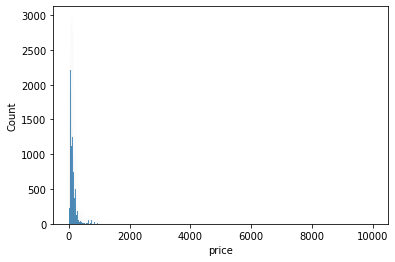

In [44]:
sns.histplot(data=y,x = y)

In [45]:
ylog1 = np.log1p(y_train)
ylog1

13575    4.605170
48476    4.060443
44499    4.262680
17382    4.875197
14638    4.709530
           ...   
13198    3.931826
14583    4.836282
6168     5.703782
12248    4.189655
20523    4.532599
Name: price, Length: 29337, dtype: float64

In [46]:

ylog1_val = np.log1p(y_val)
ylog1_val 


27408    4.189655
7741     4.499810
4771     5.303305
1719     4.795791
19153    6.618739
           ...   
31286    5.707110
35694    3.367296
14003    3.688879
13892    4.262680
10029    4.356709
Name: price, Length: 9779, dtype: float64

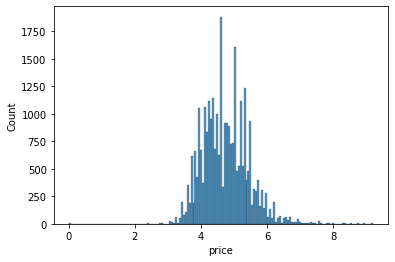

In [47]:
sns.histplot(data=ylog1,x =ylog1  )

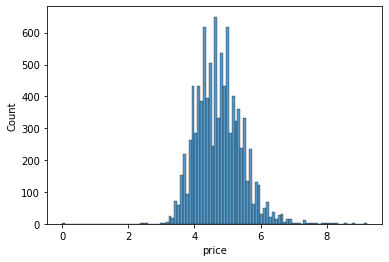

In [48]:
sns.histplot(data=ylog1_val,x =ylog1_val  )

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

In [50]:
Ridge

sklearn.linear_model._ridge.Ridge

In [ ]:
np.e

In [54]:
for i in Alpha:
  model = Ridge(alpha=i)
  model.fit(X_train1,ylog1)
  ripred = model.predict(X_val1)
  rmse = sqrt(mean_squared_error(ylog1_val,ripred))
  print(str(i),':',round(np.expm1(rmse),3))

0 : 0.644
0.01 : 0.644
0.1 : 0.644
1 : 0.644
10 : 0.645
